**import all libraries**

In [353]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**directories path**

In [471]:
cd /Users/yulduzerkiniy/Downloads/project_data_from_kaggle 

/Users/yulduzerkiniy/Downloads/project_data_from_kaggle


**Data upload**

In [355]:
TRAIN_DATASET = './train.csv'
TEST_DATASET = './test.csv'

In [356]:
X_test = pd.read_csv(TEST_DATASET, sep=',')
df = pd.read_csv(TRAIN_DATASET, sep=',')
df.tail()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
9995   1260          61    2.0  49.090728   33.272626            6.0      3   
9996  16265          27    2.0  64.307684   37.038420            9.0     13   
9997   2795         178    1.0  29.648057   16.555363            5.0      3   
9998  14561          21    1.0  32.330292   22.326870            5.0      3   
9999   7202          94    1.0  35.815476   22.301367            6.0      9   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
9995        12.0       1981   0.300323         B         B        52   
9996         0.0       1977   0.072158         B         B         2   
9997         5.0       1958   0.460556         B         B        20   
9998         9.0       1969   0.194489         B         B        47   
9999         9.0       1975   0.127376         B         B        43   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
9995     10311         6           NaN            1        9       B   
9996       629         1           NaN            0        0       A   
9997      4386        14           NaN            1        5       B   
9998      8004         3         125.0            3        5       B   
9999      8429         3           NaN            3        9       B   

              Price  
9995  119367.455796  
9996  199715.148807  
9997  165953.912580  
9998  171842.411855  
9999  177685.627486

In [357]:
X_test.head(5)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  4567          44    1.0  36.847630   19.094182            5.0      5   
1  5925          62    1.0  42.493907   42.568133           10.0      7   
2   960          27    2.0  59.463678         NaN            9.0     19   
3  3848          23    3.0  49.646030   33.893825            6.0      2   
4   746          74    1.0  53.837056         NaN            1.0      8   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1970   0.036122         B         B        24      4378   
1        17.0       2017   0.072158         B         B         2       629   
2        19.0       1977   0.211401         B         B         9      1892   
3         2.0       1965   0.014073         B         B         2       475   
4        17.0       1977   0.309479         B         B        35      7715   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
0         0        1036.0            1        1       B  
1         1           NaN            0        0       A  
2         0           NaN            0        1       B  
3         0           NaN            0        0       B  
4         4         990.0            0        6       B

In [358]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [359]:
print('Train number of rows:', df.shape[0])
print('Test number of rows', X_test.shape[0])

Train number of rows: 10000
Test number of rows 5000


In [360]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

**reduce memory usage**

In [361]:
df = reduce_mem_usage(df)
X_test = reduce_mem_usage(X_test)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%
Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.22 MB
Decreased by 70.3%


**let's see what kind of data it contains**

In [362]:
df.dtypes

Id                  int16
DistrictId          int16
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
dtype: object

plus, let's see some numbers
this is my next steps:
1. Id is all integers, but it has no particular meaning, so I'll ignore it
2. The same with DistrictId. I mean there's no particular difference between 2 districts based on their Id. But I could distinguish apartments based on their districts.
3. Rooms: it has only one strange number. Min number of rooms is 0, which is logically impossible. So I'll change all the values 0 to median (maybe)
4. Square: min is 1. It's definitely a NO. So, based on personal experience, I'll change all the values smaller than 16m^2 to median(?). Also, max is too high. I'll see it later
5. LifeSquare: the same small min here. Since it's russian apartments, again baseded on personal experience I'll say I'll change all the values less than 16m^2 to median (?). Max will be considered later as well
6. KitchenSquare: min = 0 is ok. Some apartments have no kitchen. But max is a problem
7. Important part: Square >= LifeSquare >= KitchenSquare. Maybe I could change inappropriate values.
8. Floor: it seems ok
9. HouseFloor: there is no 0 floor apartments. so I'll change it to meadian (?)
10. HouseFloor >= Floor. 
11. HouseYear: min is 1910, which seems ok. But mean and max is so bad. I guess max is affecting mean. So I need to deal with all the values greater than 2022.
12. all the ecological, health and shop data has no explanation. So I cant process my data based on them, I need to ignore them
13. Price is something I need to predict

In [363]:
df.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315720    37.199665   
std     4859.01902     43.587592      0.839522     21.058716    86.241219   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774879    22.769833   
50%     8394.50000     36.000000      2.000000     52.513309    32.781261   
75%    12592.50000     75.000000      2.000000     65.900627    45.128803   
max    16798.00000    209.000000     19.000000    641.065186  7480.592285   

       KitchenSquare         Floor  HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.0000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.6094  3.990166e+03      0.118858   
std        28.560839      5.241148      6.7762  2.005003e+05      0.119025   
min         0.000000      1.000000      0.0000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.0000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.0000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.0000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.0000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904419      1.319500   
std       17.532614   4006.799803     23.831875   1021.519470      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.937500  
std        4.806341   92872.273438  
min        0.000000   59174.777344  
25%        1.000000  153872.628906  
50%        3.000000  192269.648438  
75%        6.000000  249135.460938  
max       23.000000  633233.437500

obviuosly, LifeSquare and Helathcare_1 has some null values
we are definitely dealing with it 

In [364]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

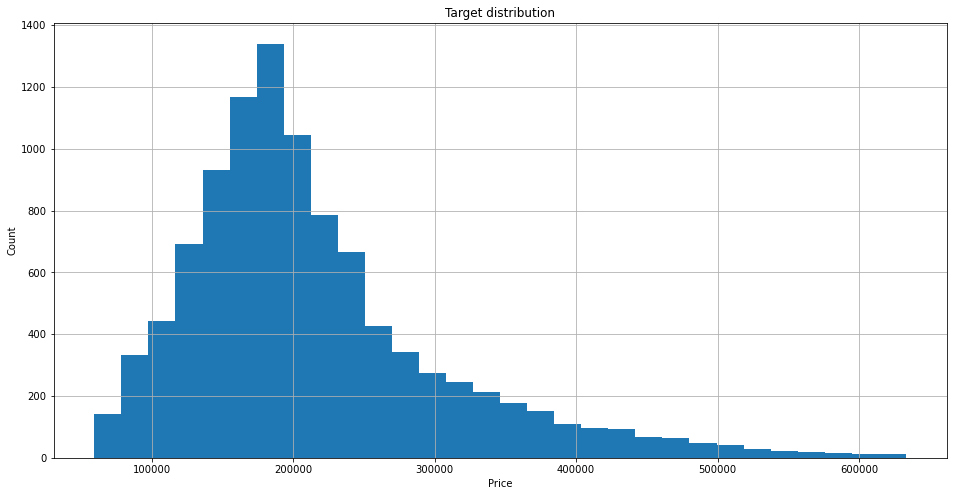

In [365]:
# let's see the distribution of Price
plt.figure(figsize = (16, 8))

df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

It seems nice and smooth

In [366]:
#id has no arithmetical meaning, so convert it to str
df['Id'] = df['Id'].astype(str)
X_test['Id'] = X_test['Id'].astype(str)


let's consider all them one by one:
Rooms

In [367]:
df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [368]:
feature_names = ['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 
                 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1',
                 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2',
                 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1',
                 'Shops_2']

target_name = 'Price'

In [369]:
X = df[feature_names]
y = df[target_name]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

In [370]:
y.value_counts()

298194.500000    2
204576.421875    2
238608.656250    2
182938.078125    2
305018.875000    1
                ..
162953.437500    1
321975.375000    1
423176.906250    1
185190.984375    1
177685.625000    1
Name: Price, Length: 9996, dtype: int64

In [371]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

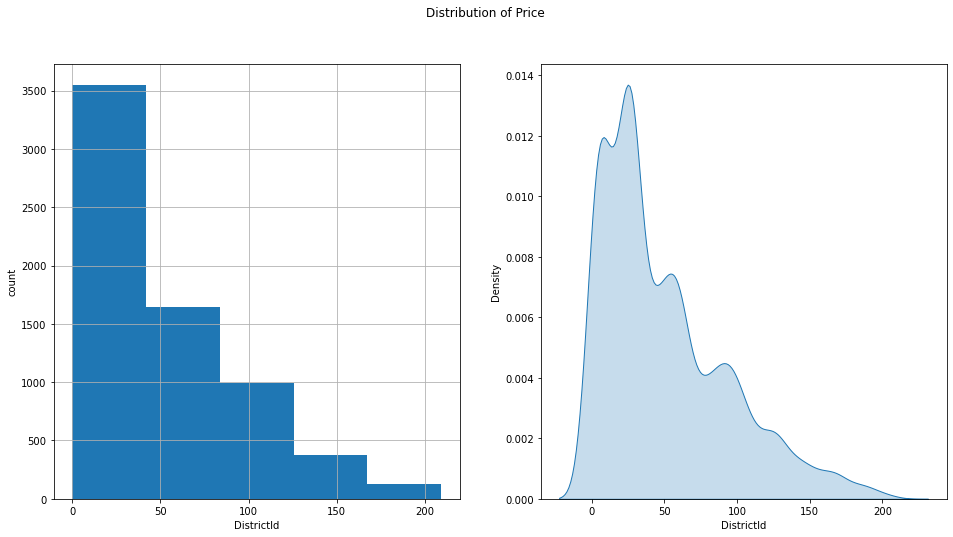

In [450]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
X_train['DistrictId'].hist(density=False, bins=5)
plt.ylabel('count')
plt.xlabel('DistrictId')

plt.subplot(122)
sns.kdeplot(X_train['DistrictId'], shade=True, legend=False)
plt.xlabel('DistrictId')

plt.suptitle('Distribution of Price')
plt.show()

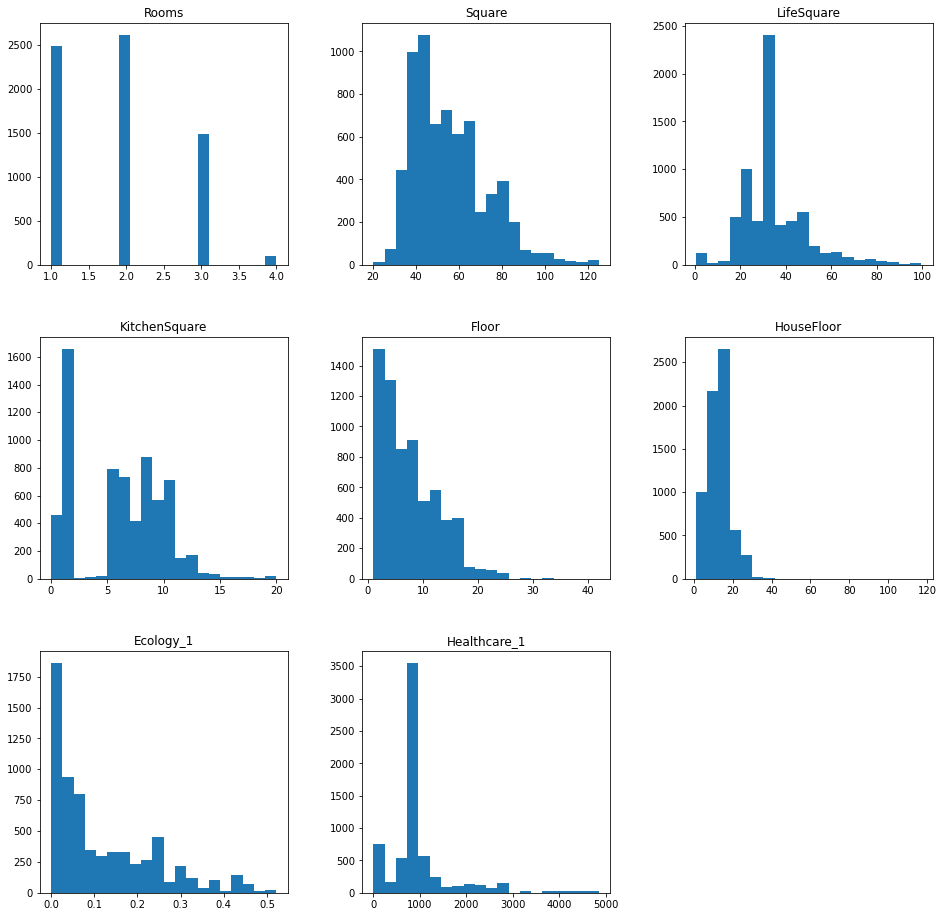

In [451]:
df_num_features = X_train.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

In [380]:
X_test['Rooms'].value_counts()

2.0    2042
1.0    1769
3.0    1099
4.0      90
Name: Rooms, dtype: int64

I'll get rid of apartments with 5, 0, 10, 19, 6, 17 rooms. Too little
information

In [427]:
class DataPreprocessing:
    """Preprosessing data"""

    def __init__(self):
        """Class parameters"""
        self.medians = None
        
    def fit(self, X):
        """Statistics"""       
        # Расчет медиан
        self.medians = X.median()
    
    def transform(self, X):
        """Data transformation"""

        # Rooms
        X.loc[X['Rooms'].isin([5, 0, 10, 19, 6, 17]), 'Rooms'] = int(X_train['Rooms'].median())
        
        #LifeSquare
        X["LifeSquare"].fillna(X_train['LifeSquare'].median(), inplace = True)
        
        #KitchenSquare
        X.loc[X['KitchenSquare']>20, 'KitchenSquare'] = X_train['KitchenSquare'].median()

        #Square
        X.loc[X['Square']>125, 'Square'] = X_train['Square'].median()
        X.loc[X['Square']<20, 'Square'] = X_train['Square'].median()

        #LifeSquare
        X.loc[X['LifeSquare']>100, 'LifeSquare'] = X_train['LifeSquare'].median()

        #HouseFloor
        X.loc[X['HouseFloor']==0, 'HouseFloor'] = X_train['HouseFloor'].median()

        idx = (X['HouseFloor'] < X['Floor'])
        X.loc[idx, ['Floor', 'HouseFloor']] = X.loc[idx,['HouseFloor', 'Floor']].values

        #HouseYear
        X.loc[X['HouseYear']>2020, 'HouseYear'] = 2020
        X.loc[X['HouseYear']<1910, 'HouseYear'] = X_train['HouseYear'].median()

        #Healathcare_1
        X.loc[X['Healthcare_1'].isnull(), 'Healthcare_1'] = X_train['Healthcare_1'].median()

        #Ecology Shop
        X['Ecology_2_bin'] = X['Ecology_2'].replace({'A':0, 'B':1})
        X['Ecology_3_bin'] = X['Ecology_3'].replace({'A':0, 'B':1})
        X['Shops_2_bin'] = X['Shops_2'].replace({'A':0, 'B':1})

        #Shop2
        X.drop('Shops_2', inplace=True, axis=1)

        
        return X

In [428]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test = preprocessor.transform(X_test)


I gonna divide my data into X_valid and X_train, then do this everything to both of them in parallel.
X_valid and X_train may have different values of rooms
I will ignore values with 19, 10, 0 and even 5 (and some others) rooms. Cause too little data. 0 is even impossible to have.

Square, LifeSquare, Kitchersquare

In [381]:
X_train.describe()

DistrictId        Rooms       Square   LifeSquare  KitchenSquare  \
count  6700.000000  6700.000000  6700.000000  5272.000000    6700.000000   
mean     50.219104     1.879851    56.116043    35.950314       6.459552   
std      43.523441     0.799522    21.770365    20.322599      34.706615   
min       0.000000     1.000000     1.136859     0.370619       0.000000   
25%      19.000000     1.000000    41.700566    22.641048       1.000000   
50%      35.000000     2.000000    52.300299    32.546005       6.000000   
75%      75.000000     2.000000    65.671501    44.986683       9.000000   
max     209.000000     4.000000   641.065186   638.163208    2014.000000   

             Floor   HouseFloor     HouseYear    Ecology_1     Social_1  \
count  6700.000000  6700.000000  6.700000e+03  6700.000000  6700.000000   
mean      8.418806    12.514776  4.977641e+03     0.118486    24.611493   
std       5.199539     6.763745  2.449501e+05     0.119817    17.542611   
min       1.000000     0.000000  1.912000e+03     0.000000     0.000000   
25%       4.000000     9.000000  1.973000e+03     0.017647     6.000000   
50%       7.000000    12.000000  1.977000e+03     0.072158    25.000000   
75%      12.000000    17.000000  2.000000e+03     0.194489    36.000000   
max      42.000000   117.000000  2.005201e+07     0.521867    74.000000   

           Social_2     Social_3  Healthcare_1  Helthcare_2      Shops_1  
count   6700.000000  6700.000000   3446.000000  6700.000000  6700.000000  
mean    5339.214179     7.847313   1136.049072     1.310000     4.178358  
std     4021.361282    23.429653   1026.395264     1.490234     4.759257  
min      168.000000     0.000000      0.000000     0.000000     0.000000  
25%     1564.000000     0.000000    350.000000     0.000000     1.000000  
50%     5285.000000     2.000000    900.000000     1.000000     3.000000  
75%     7227.000000     5.000000   1547.750000     2.000000     5.000000  
max    19083.000000   141.000000   4849.000000     6.000000    23.000000

Rooms is quite clean now. 

In [382]:
X_train.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1428
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     3254
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [386]:
X_valid.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     1544
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [383]:
X_test.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

we'll deal with too big values or some inappropriate values first:

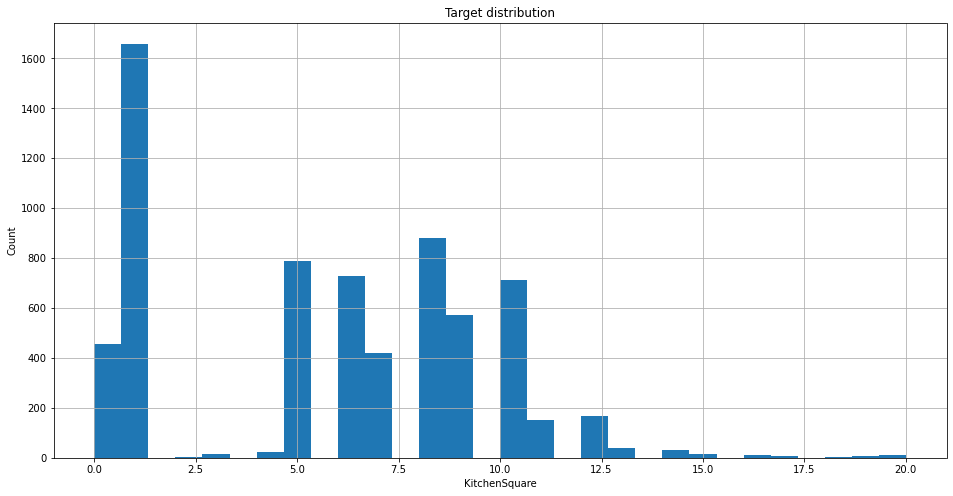

In [390]:
# let's see the distribution of KitchenSquare in X_train
plt.figure(figsize = (16, 8))

X_train['KitchenSquare'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('KitchenSquare')

plt.title('Target distribution')
plt.show()

In [150]:
X_train[X_train['KitchenSquare']>20].count()

Id               34
DistrictId       34
Rooms            34
Square           34
LifeSquare       34
KitchenSquare    34
Floor            34
HouseFloor       34
HouseYear        34
Ecology_1        34
Ecology_2        34
Ecology_3        34
Social_1         34
Social_2         34
Social_3         34
Healthcare_1     15
Helthcare_2      34
Shops_1          34
Shops_2          34
dtype: int64

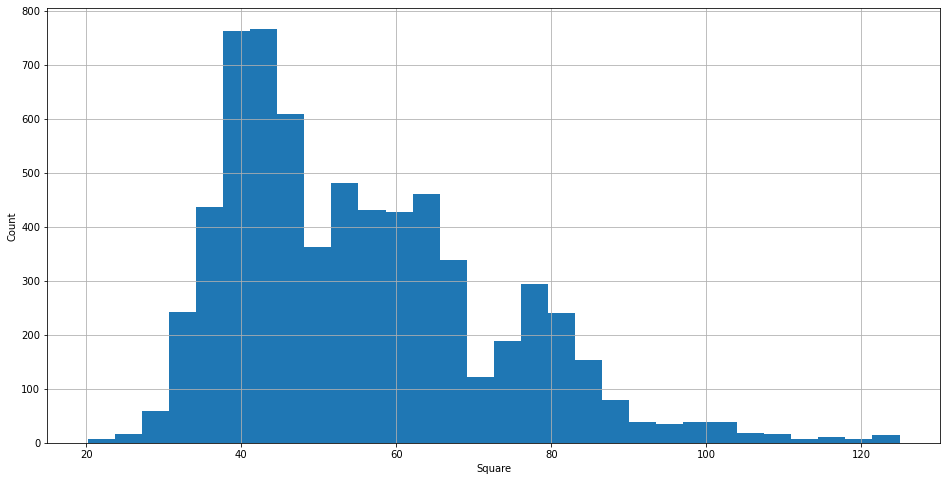

In [397]:
# let's see the distribution of Square
plt.figure(figsize = (16, 8))

X_train['Square'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Square')

plt.show()

In [392]:
X_train[X_train['Square']>125].count()

Id               44
DistrictId       44
Rooms            44
Square           44
LifeSquare       44
KitchenSquare    44
Floor            44
HouseFloor       44
HouseYear        44
Ecology_1        44
Ecology_2        44
Ecology_3        44
Social_1         44
Social_2         44
Social_3         44
Healthcare_1     23
Helthcare_2      44
Shops_1          44
Shops_2          44
dtype: int64

In [393]:
X_train[X_train['Square']<20].count()

Id               14
DistrictId       14
Rooms            14
Square           14
LifeSquare       14
KitchenSquare    14
Floor            14
HouseFloor       14
HouseYear        14
Ecology_1        14
Ecology_2        14
Ecology_3        14
Social_1         14
Social_2         14
Social_3         14
Healthcare_1      6
Helthcare_2      14
Shops_1          14
Shops_2          14
dtype: int64

I decided to substitute values of Square higher than 125 to the median

it seems like it could be a good idea to divide them in castes. we'll see

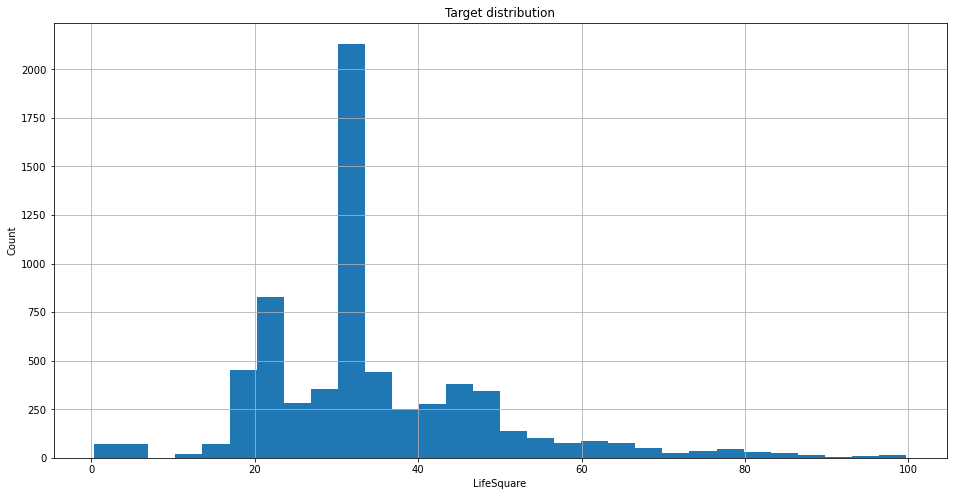

In [402]:
# let's see the distribution of LifeSquare in X_train
plt.figure(figsize = (16, 8))

X_train['LifeSquare'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('LifeSquare')

plt.title('Target distribution')
plt.show()

In [399]:
X_train[X_train['LifeSquare']>100].count()

Id               33
DistrictId       33
Rooms            33
Square           33
LifeSquare       33
KitchenSquare    33
Floor            33
HouseFloor       33
HouseYear        33
Ecology_1        33
Ecology_2        33
Ecology_3        33
Social_1         33
Social_2         33
Social_3         33
Healthcare_1     13
Helthcare_2      33
Shops_1          33
Shops_2          33
dtype: int64

maybe to some point it's reasonable to have 0 LifeSquare. Also, the 
data has too many apartments with little LifeSquare

**Floor, HouseFloor**

first, let's get rid of 0 in HouseFloor

secondly, Floor <= HouseFloor

In [406]:
X_train[X_train['Floor'] > X_train['HouseFloor']].count()

Id               1079
DistrictId       1079
Rooms            1079
Square           1079
LifeSquare       1079
KitchenSquare    1079
Floor            1079
HouseFloor       1079
HouseYear        1079
Ecology_1        1079
Ecology_2        1079
Ecology_3        1079
Social_1         1079
Social_2         1079
Social_3         1079
Healthcare_1      561
Helthcare_2      1079
Shops_1          1079
Shops_2          1079
dtype: int64

it seems like there're lots of row with Floor > HouseFloor.
What I could do to make sure that Floor < HouseFloor, is to swap them. Changing some values with median will not solve it completely. I'm not sure if it's right, but let's try

In [409]:
X_valid[X_valid['Floor'] > X_valid['HouseFloor']].count()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

In [243]:
X_test[X_test['Floor'] > X_test['HouseFloor']].count()

Id               792
DistrictId       792
Rooms            792
Square           792
LifeSquare       792
KitchenSquare    792
Floor            792
HouseFloor       792
HouseYear        792
Ecology_1        792
Ecology_2        792
Ecology_3        792
Social_1         792
Social_2         792
Social_3         792
Healthcare_1     410
Helthcare_2      792
Shops_1          792
Shops_2          792
dtype: int64

In [412]:
X_test.describe()

DistrictId        Rooms       Square   LifeSquare  KitchenSquare  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean     51.279200     1.902000    55.940327    34.858028       5.694000   
std      44.179466     0.797574    17.294071    14.137178       3.805549   
min       0.000000     1.000000    20.011215     0.333490       0.000000   
25%      21.000000     1.000000    41.977761    25.850152       1.000000   
50%      37.000000     2.000000    52.452431    32.546005       6.000000   
75%      77.000000     2.000000    65.976419    41.247561       9.000000   
max     212.000000     4.000000   124.285217    99.538612      20.000000   

             Floor   HouseFloor    HouseYear    Ecology_1     Social_1  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      8.046200    13.501200  1984.392600     0.119874    24.933800   
std       5.330567     6.147134    18.573149     0.120070    17.532202   
min       1.000000     1.000000  1908.000000     0.000000     0.000000   
25%       4.000000     9.000000  1973.000000     0.019509     6.000000   
50%       7.000000    14.000000  1977.000000     0.072158    25.000000   
75%      12.000000    17.000000  2000.000000     0.195781    36.000000   
max      46.000000    99.000000  2020.000000     0.521867    74.000000   

           Social_2     Social_3  Healthcare_1  Helthcare_2      Shops_1  
count   5000.000000  5000.000000   2623.000000   5000.00000  5000.000000  
mean    5406.900000     8.262600   1146.657227      1.31940     4.242800  
std     4026.614773    23.863762   1044.745605      1.47994     4.777365  
min      168.000000     0.000000      0.000000      0.00000     0.000000  
25%     1564.000000     0.000000    325.000000      0.00000     1.000000  
50%     5285.000000     2.000000    900.000000      1.00000     3.000000  
75%     7287.000000     5.000000   1548.000000      2.00000     6.000000  
max    19083.000000   141.000000   4849.000000      6.00000    23.000000

**HouseYear**

it seems X_valid and X_test have clean data on HouseYear. But X_train needs to be cleaned. Also, it seems data was gathered in 2020

In [413]:
X_train[X_train['HouseYear']>2020]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
8828  11607         147    2.0  44.791836   28.360394            5.0    4.0   
9163  10814         109    1.0  37.265072   20.239714            9.0    9.0   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
8828         9.0       4968   0.319809         B         B        25   
9163        12.0   20052011   0.136330         B         B        30   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
8828      4756        16        2857.0            5        8       B  
9163      6141        10         262.0            3        6       B

In [418]:
X_test[X_test['HouseYear']<1910].count()

Id               2
DistrictId       2
Rooms            2
Square           2
LifeSquare       2
KitchenSquare    2
Floor            2
HouseFloor       2
HouseYear        2
Ecology_1        2
Ecology_2        2
Ecology_3        2
Social_1         2
Social_2         2
Social_3         2
Healthcare_1     1
Helthcare_2      2
Shops_1          2
Shops_2          2
dtype: int64

**Healthcare_1**, let's get rid of NaNs

In [421]:
X_train['Healthcare_1'].head()

8371       NaN
5027    1970.0
9234       NaN
3944     145.0
6862       NaN
Name: Healthcare_1, dtype: float32

In [251]:
X_train.head(5)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
8371  11131          70    3.0  72.593849   72.032387            7.0   15.0   
5027   2947          24    2.0  38.427761   26.170250            6.0    3.0   
9234  11409          13    2.0  59.198891   35.928226           10.0    7.0   
3944   1004         113    2.0  38.128403   23.055471            6.0    7.0   
6862  12342          27    1.0  40.490421    4.114601            0.0   20.0   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
8371        16.0       1976   0.002212         B         B        39   
5027        12.0       1969   0.111627         B         B        50   
9234        17.0       1999   0.090799         B         B        74   
3944        14.0       1970   0.050756         B         B        24   
6862        22.0       2019   0.211401         B         B         9   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
8371      7614         3         900.0            1        5       A  
5027     12238         8        1970.0            2        3       B  
9234     19083         2         900.0            5       15       B  
3944      5469         1         145.0            0        1       B  
6862      1892         0         900.0            0        1       B

**Ecology, Shop** and others that have no meaning for a time being

**DistrictSize, IsDistrictLarge**

In [455]:
class FeatureGenetator():
    """Features generator"""
    
    def __init__(self):
        self.DistrictSize = None
        self.IsDistrictLarge = None
      
    def fit(self, X, y=None):
        
        X = X.copy()
        
        return X
    
    def CreateDistrictSize(self, X):
        """Data transformation"""

        # DistrictSize
        district_size = X['DistrictId'].value_counts().reset_index()\
               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

        X = X.merge(district_size, on='DistrictId', how='left')

        return X
    
    
    def CreateIsDistrictLarge(self, X):
        
        # IsDistrictLarge
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)

        return X
    

        
    

In [456]:
featureGenerator = FeatureGenetator()
featureGenerator.fit(X_train)

X_train = featureGenerator.CreateDistrictSize(X_train)
X_valid = featureGenerator.CreateDistrictSize(X_valid)
X_test = featureGenerator.CreateDistrictSize(X_test)

X_train = featureGenerator.CreateIsDistrictLarge(X_train)
X_valid = featureGenerator.CreateIsDistrictLarge(X_valid)
X_test = featureGenerator.CreateIsDistrictLarge(X_test)



In [448]:
(X_train['DistrictSize'] > 100).value_counts()

False    4101
True     2599
Name: DistrictSize, dtype: int64

In [449]:
X_train.describe()

DistrictId        Rooms       Square   LifeSquare  KitchenSquare  \
count  6700.000000  6700.000000  6700.000000  6700.000000    6700.000000   
mean     50.219104     1.879851    55.378120    34.624603       5.659104   
std      43.523441     0.799522    17.112553    14.202325       3.853244   
min       0.000000     1.000000    20.213127     0.370619       0.000000   
25%      19.000000     1.000000    41.760659    25.025035       1.000000   
50%      35.000000     2.000000    52.300209    32.546005       6.000000   
75%      75.000000     2.000000    65.345228    40.812401       9.000000   
max     209.000000     4.000000   124.936035    99.684776      20.000000   

             Floor   HouseFloor    HouseYear    Ecology_1     Social_1  \
count  6700.000000  6700.000000  6700.000000  6700.000000  6700.000000   
mean      7.794030    13.460149  1984.664925     0.118486    24.611493   
std       5.124685     5.994920    18.360307     0.119817    17.542611   
min       1.000000     1.000000  1912.000000     0.000000     0.000000   
25%       4.000000     9.000000  1973.000000     0.017647     6.000000   
50%       7.000000    14.000000  1977.000000     0.072158    25.000000   
75%      11.000000    17.000000  2000.000000     0.194489    36.000000   
max      42.000000   117.000000  2020.000000     0.521867    74.000000   

           Social_2     Social_3  Healthcare_1  Helthcare_2      Shops_1  \
count   6700.000000  6700.000000   6700.000000  6700.000000  6700.000000   
mean    5339.214179     7.847313   1021.406738     1.310000     4.178358   
std     4021.361282    23.429653    745.448730     1.490234     4.759257   
min      168.000000     0.000000      0.000000     0.000000     0.000000   
25%     1564.000000     0.000000    830.000000     0.000000     1.000000   
50%     5285.000000     2.000000    900.000000     1.000000     3.000000   
75%     7227.000000     5.000000    990.000000     2.000000     5.000000   
max    19083.000000   141.000000   4849.000000     6.000000    23.000000   

       DistrictSize_x  DistrictSize_y  DistrictSize  IsDistrictLarge  
count     6700.000000     6700.000000   6700.000000       6700.00000  
mean       164.040299      164.040299    164.040299          0.38791  
std        181.693963      181.693963    181.693963          0.48731  
min          1.000000        1.000000      1.000000          0.00000  
25%         38.000000       38.000000     38.000000          0.00000  
50%         71.000000       71.000000     71.000000          0.00000  
75%        349.000000      349.000000    349.000000          1.00000  
max        568.000000      568.000000    568.000000          1.00000

In [457]:
X_train.drop('DistrictId', inplace=True, axis=1)
X_valid.drop('DistrictId', inplace=True, axis=1)
X_test.drop('DistrictId', inplace=True, axis=1)

X_train.drop('Id', inplace=True, axis=1)
X_valid.drop('Id', inplace=True, axis=1)
X_test.drop('Id', inplace=True, axis=1)

In [458]:
X_train.drop('Ecology_2', inplace=True, axis=1)
X_valid.drop('Ecology_2', inplace=True, axis=1)
X_test.drop('Ecology_2', inplace=True, axis=1)

X_train.drop('Ecology_3', inplace=True, axis=1)
X_valid.drop('Ecology_3', inplace=True, axis=1)
X_test.drop('Ecology_3', inplace=True, axis=1)

In [461]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """
    # дописать документация
    Выводить R2 и строит графики для оценки качества модели
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))

    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

**Model**

In [462]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [ ]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=6,
                                     min_samples_leaf=50,
                                     random_state=42,  
                                     n_estimators=2250, 
                                     max_features='sqrt', 
                                     loss='huber', 
                                     learning_rate=0.025)

gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
y_valid_preds = gb_model.predict(X_valid)
print(r2(y_train, y_train_preds))
print(r2(y_valid, y_valid_preds))

Train R2:	0.853
Test R2:	0.687


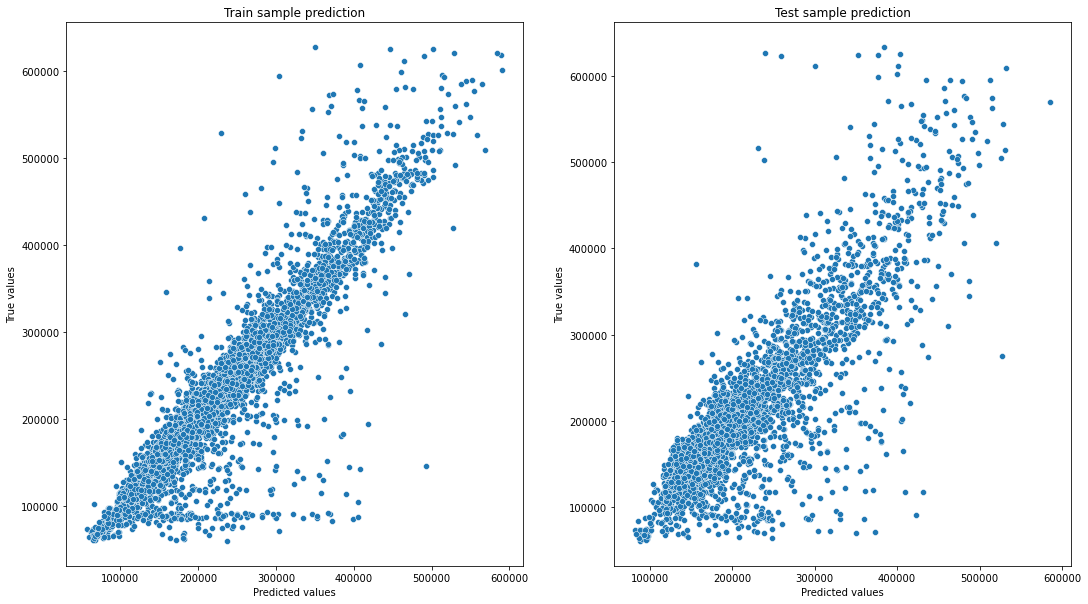

In [465]:
evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

In [466]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

feature_name  importance
1           Square    0.518064
17  DistrictSize_x    0.300843
10        Social_3    0.052821
0            Rooms    0.036295
7        Ecology_1    0.021181
8         Social_1    0.015287
9         Social_2    0.012886
5       HouseFloor    0.009817
6        HouseYear    0.007815
3    KitchenSquare    0.006530
11    Healthcare_1    0.005863
2       LifeSquare    0.005387
12     Helthcare_2    0.002560
4            Floor    0.002180
13         Shops_1    0.002064
18  DistrictSize_y    0.000182
16     Shops_2_bin    0.000160
14   Ecology_2_bin    0.000033
15   Ecology_3_bin    0.000030

**Predicting on X_test**

In [467]:
X_test.shape

(5000, 23)

In [468]:
X_test

Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0       1.0  36.847630   19.094183            5.0    5.0         9.0   
1       1.0  42.493908   42.568134           10.0    7.0        17.0   
2       2.0  59.463676   32.546005            9.0   19.0        19.0   
3       3.0  49.646030   33.893826            6.0    2.0         2.0   
4       1.0  53.837055   32.546005            1.0    8.0        17.0   
...     ...        ...         ...            ...    ...         ...   
4995    2.0  43.177521   30.339945            5.0    5.0         6.0   
4996    3.0  93.698120   94.521461           10.0   21.0        27.0   
4997    1.0  33.656723   19.003260            5.0    2.0         5.0   
4998    1.0  38.635155   20.976257            9.0    8.0        14.0   
4999    2.0  67.122742   33.944344           13.0    9.0        17.0   

      HouseYear  Ecology_1  Social_1  Social_2  ...  Shops_1  Ecology_2_bin  \
0          1970   0.036122        24      4378  ...        1              1   
1          2017   0.072158         2       629  ...        0              1   
2          1977   0.211401         9      1892  ...        1              1   
3          1965   0.014073         2       475  ...        0              1   
4          1977   0.309479        35      7715  ...        6              1   
...         ...        ...       ...       ...  ...      ...            ...   
4995       1962   0.069660        31      6119  ...        2              1   
4996       2018   0.060753        15      2787  ...        7              1   
4997       1966   0.038693        28      6533  ...        5              1   
4998       1970   0.089040        33      7976  ...       11              1   
4999       2009   0.194489        47      8004  ...        5              1   

      Ecology_3_bin  Shops_2_bin DistrictSize_x  DistrictSize_y  \
0                 1            1             46              46   
1                 1            0            122             122   
2                 1            1            391             391   
3                 1            1            264             264   
4                 1            1             61              61   
...             ...          ...            ...             ...   
4995              1            1             60              60   
4996              1            1             16              16   
4997              1            1             46              46   
4998              1            1             16              16   
4999              1            1             70              70   

     DistrictSize_x  IsDistrictLarge  DistrictSize_y  DistrictSize  
0                46                0              46            46  
1               122                1             122           122  
2               391                1             391           391  
3               264                1             264           264  
4                61                0              61            61  
...             ...              ...             ...           ...  
4995             60                0              60            60  
4996             16                0              16            16  
4997             46                0              46            46  
4998             16                0              16            16  
4999             70                0              70            70  

[5000 rows x 23 columns]

In [472]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

Id     Price
0  4567  200000.0
1  5925  200000.0
2   960  200000.0
3  3848  200000.0
4   746  200000.0

In [475]:
predictions = gb_model.predict(X_test)
predictions

array([158735.303488  , 128642.64957708, 147203.27504548, ...,
       149542.4570342 , 185409.23135045, 344615.86164858])

In [476]:
submit['Price'] = predictions
submit.head()

Id          Price
0  4567  158735.303488
1  5925  128642.649577
2   960  147203.275045
3  3848  154349.715912
4   746  191291.427773

In [477]:
submit.to_csv('rf_submit2.csv', index=False)